<a href="https://colab.research.google.com/github/shaloy-lewis/cardiovascular_risk_prediction/blob/main/Cardiovascular_Risk_Prediction_Shaloy_Lewis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u>**Project Title : Cardiovascular Risk Prediction**

##**Problem Description**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information.

Variables: Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.


## **Data Description**

Demographic:
* Sex: male or female ("M" or "F")
* Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* Education: The level of education of the patient (categorical values - 1,2,3,4)

Behavioral:
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical (history):
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

Medical (current):
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

# **Importing the libraries and the dataset:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [2]:
# Importing data
path = '/content/drive/MyDrive/Cardiovascular Risk Prediction - Shaloy Lewis/cardiovascular_risk.csv'

df = pd.read_csv(path,index_col='id')

In [3]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
df.shape

(3390, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


# **Data Cleaning:**

In [6]:
# Renaming the columns
df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [7]:
df.head()

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [8]:
# Defining 3 lists containing the column names of 
# a. dependent variables
# b. continuous independent variables
# c. categorical independent variables

dependent_var = ['ten_year_chd']
continuous_var = ['age','cigs_per_day','total_cholesterol','systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']

In [9]:
# Encoding the binary columns

df['sex'] = np.where(df['sex'] == 'M',1,0)
df['is_smoking'] = np.where(df['is_smoking'] == 'YES',1,0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   education          3303 non-null   float64
 2   sex                3390 non-null   int64  
 3   is_smoking         3390 non-null   int64  
 4   cigs_per_day       3368 non-null   float64
 5   bp_meds            3346 non-null   float64
 6   prevalent_stroke   3390 non-null   int64  
 7   prevalent_hyp      3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3352 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3376 non-null   float64
 13  heart_rate         3389 non-null   float64
 14  glucose            3086 non-null   float64
 15  ten_year_chd       3390 non-null   int64  
dtypes: float64(9), int64(7)


In [11]:
df.describe()

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
count,3390.000000,3303.000000,3390.000000,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,0.432743,0.497640,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,0.495529,0.500068,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


# **Handling missing data:**

In [12]:
# checking for null values
df.isna().sum()

age                    0
education             87
sex                    0
is_smoking             0
cigs_per_day          22
bp_meds               44
prevalent_stroke       0
prevalent_hyp          0
diabetes               0
total_cholesterol     38
systolic_bp            0
diastolic_bp           0
bmi                   14
heart_rate             1
glucose              304
ten_year_chd           0
dtype: int64

In [13]:
# total null values
df.isna().sum().sum()

510

There are a total of 510 missing values in the dataset.

**1. Replacing the missing values in the categorical columns with the most frequent entry: bold text**

In [14]:
# Replacing the missing values in the categorical columns with its mode
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['bp_meds'] = df['bp_meds'].fillna(df['bp_meds'].mode()[0])

In [15]:
df.education.value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [16]:
df.bp_meds.value_counts()

0.0    3290
1.0     100
Name: bp_meds, dtype: int64

**2. cigs_per_day:**

In [17]:
# Mean and median of cigarettes per day
df.cigs_per_day.mean().round(0),df.cigs_per_day.median()

(9.0, 0.0)

In [18]:
# All missing values in the cigs_per_day column
df[df['cigs_per_day'].isna()]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
422,55,1.0,0,1,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,1,1,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,1,1,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,1.0,0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,0,1,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,1,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,0,1,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,0,1,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0


From the above table, we find that for every instance of missing values in cigs per day, the patients reported that they smoke.

Let's check the mean and median number of cigarettes smoked by patients, who reported that they smoke.

In [19]:
# mean and median cigarettes per day for a smoker
df[df['is_smoking']==1]['cigs_per_day'].mean(),df[df['is_smoking']==1]['cigs_per_day'].median()

(18.345945945945946, 20.0)

* Mean number of cigarettes for a smoker = 18.34
* Median number of cigarettes for a smoker = 20

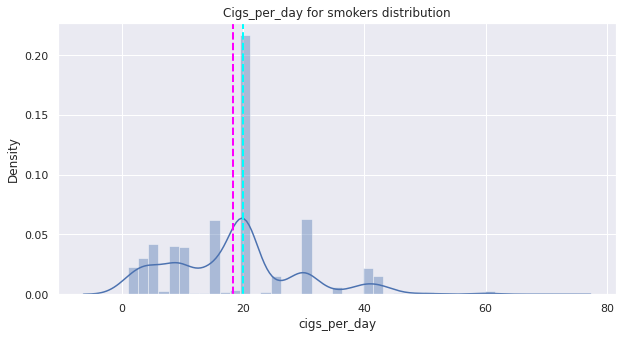

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['is_smoking']==1]['cigs_per_day'])
plt.axvline(df[df['is_smoking']==1]['cigs_per_day'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[df['is_smoking']==1]['cigs_per_day'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Cigs_per_day for smokers distribution')
plt.show()

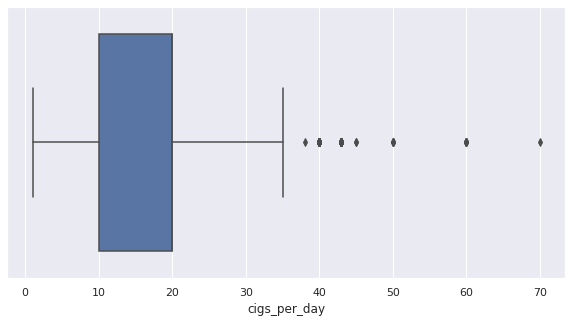

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(df[df['is_smoking']==1]['cigs_per_day'])

Since the number of cigarettes smoked by the patients who smoke contains outliers, the missing values in ths cigs_per_day column can be imputed with its median value.

In [22]:
# Imputing the missing values in the cigs_per_day 
df['cigs_per_day'] = df['cigs_per_day'].fillna(df[df['is_smoking']==1]['cigs_per_day'].median())

In [23]:
# Checking for any wrong entries where the patient is not a smoker
# and cigarettes per day above 0

df[(df['is_smoking']==0) & (df['cigs_per_day']>0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,


In [24]:
# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

df[(df['is_smoking']==1) & (df['cigs_per_day']==0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,


There are no errors in these columns.

**3. total_cholestrol, bmi, heart_rate:**

In [25]:
df.isna().sum()

age                    0
education              0
sex                    0
is_smoking             0
cigs_per_day           0
bp_meds                0
prevalent_stroke       0
prevalent_hyp          0
diabetes               0
total_cholesterol     38
systolic_bp            0
diastolic_bp           0
bmi                   14
heart_rate             1
glucose              304
ten_year_chd           0
dtype: int64

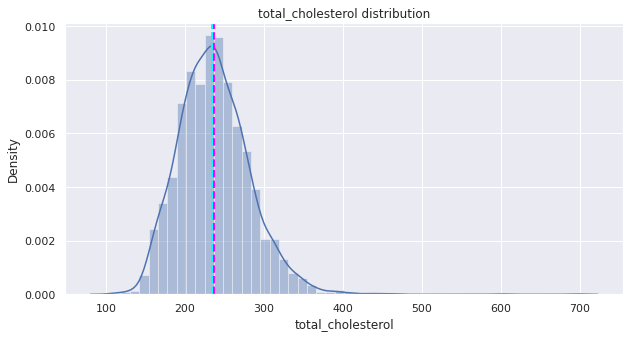

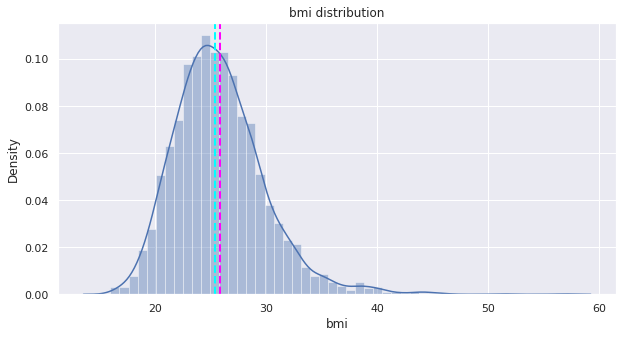

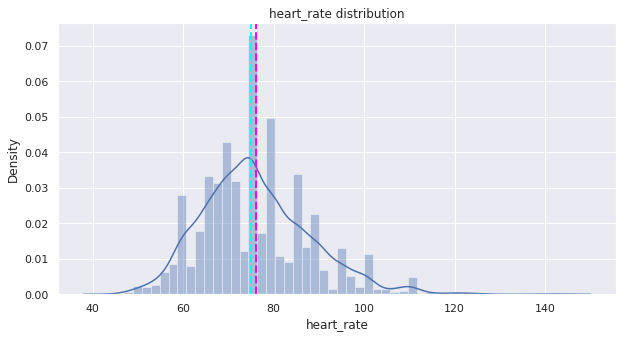

In [26]:
for i in ['total_cholesterol','bmi','heart_rate']:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])
  plt.axvline(df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[i].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(i+' distribution')
  plt.show()

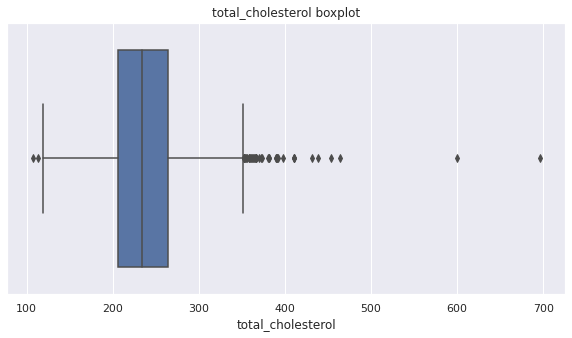

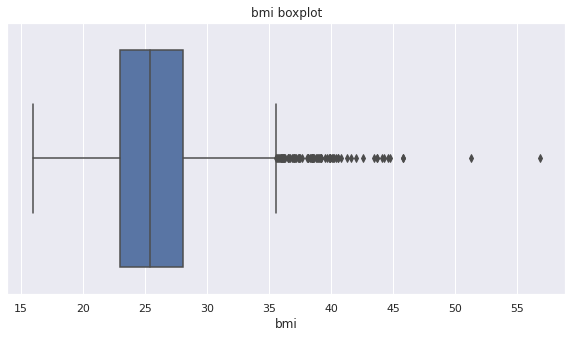

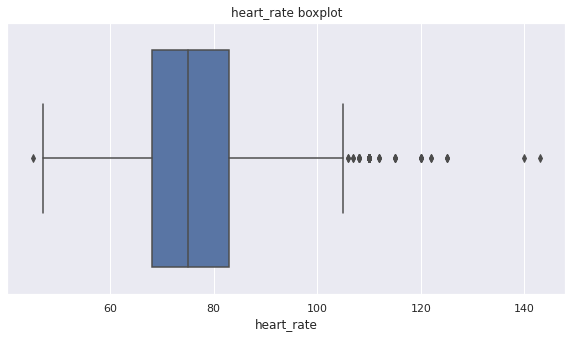

In [27]:
for i in ['total_cholesterol','bmi','heart_rate']:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[i])
  plt.title(i+' boxplot')
  plt.show()

In [28]:
df.total_cholesterol.mean(),df.total_cholesterol.median()

(237.07428400954655, 234.0)

In [29]:
df.bmi.mean(),df.bmi.median()

(25.7949644549763, 25.38)

In [30]:
df.heart_rate.mean(),df.heart_rate.median()

(75.97727943346119, 75.0)

Since the total_cholestrol, bmi, and heart_rate columns are positively skewed, and also contains outliers. We can impute the missing values with its median.

In [31]:
df['total_cholesterol'] = df['total_cholesterol'].fillna(df['total_cholesterol'].median())
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['heart_rate'] = df['heart_rate'].fillna(df['heart_rate'].median())

In [32]:
df.total_cholesterol.mean(),df.total_cholesterol.median()

(237.03982300884957, 234.0)

In [33]:
df.bmi.mean(),df.bmi.median()

(25.793250737463126, 25.38)

In [34]:
df.heart_rate.mean(),df.heart_rate.median()

(75.97699115044247, 75.0)

**4. glucose:**

In [35]:
df.glucose.isna().sum()

304

The glucose column contains 304 missing values.

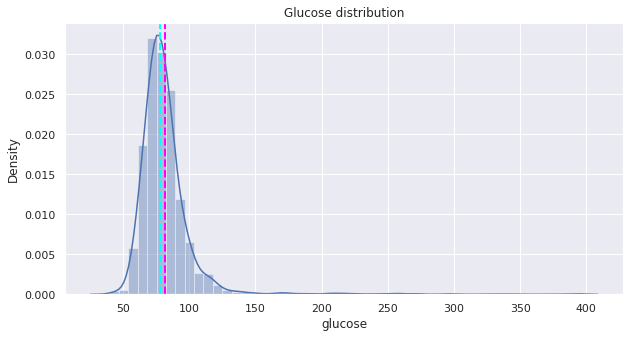

In [36]:
# distribution of glucose

plt.figure(figsize=(10,5))
sns.distplot(df['glucose'])
plt.axvline(df['glucose'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['glucose'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Glucose distribution')
plt.show()

Text(0.5, 1.0, 'Glucose boxplot')

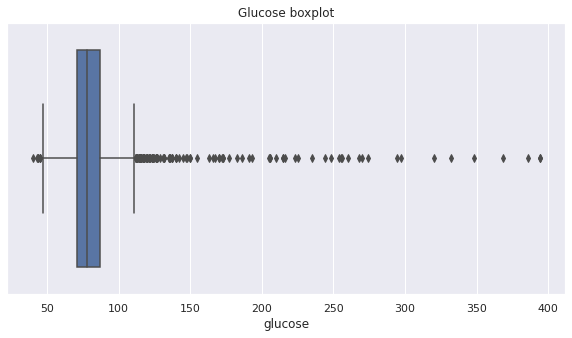

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(df['glucose'])
plt.title('Glucose boxplot')

In [38]:
df.glucose.mean(),df.glucose.median(),df.glucose.mode()

(82.08651976668827, 78.0, 0    75.0
 dtype: float64)

* The distribution is positively skewed, with outliers.
* There are 304 missing values in the glucose column. If we choose to impute them with a single value of mean / median, we will be adding high bias at that point.
* To avoid this we can impute the missing values using KNN imputer.
* If the dataset in question had been a time series, we could have used the interpolation method to impute the missing values.

In [39]:
# Using KNN imputer with K=10
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

In [40]:
df.glucose.mean(),df.glucose.median(),df.glucose.mode()

(82.04327433628319, 78.0, 0    75.0
 dtype: float64)

After KNN imputation, there is no massive change in the values of mean, and the values of median and mode remain the same.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   float64
 2   sex                3390 non-null   float64
 3   is_smoking         3390 non-null   float64
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   float64
 7   prevalent_hyp      3390 non-null   float64
 8   diabetes           3390 non-null   float64
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   float64
dtypes: float64(16)
memory us

The KNN imputer has converted all the columns to the float64 datatype. Hence, changing the column datatype accordingly as per the kind of data stored in the respective column.

In [42]:
# changing datatypes
df = df.astype({'age': int, 'education':int,'sex':int,'is_smoking':int,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   education          3390 non-null   int64  
 2   sex                3390 non-null   int64  
 3   is_smoking         3390 non-null   int64  
 4   cigs_per_day       3390 non-null   int64  
 5   bp_meds            3390 non-null   int64  
 6   prevalent_stroke   3390 non-null   int64  
 7   prevalent_hyp      3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   int64  
dtypes: float64(6), int64(10)

In [44]:
df.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

We have successfully handled all the missing values in the dataset.

# **Exploratory Data Analysis:**

In [45]:
df.shape

(3390, 16)

In [46]:
df.describe()

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,49.542183,1.946018,0.432743,0.497640,9.140413,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,82.043274,0.150737
std,8.592878,1.017568,0.495529,0.500068,11.872952,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.236590,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,86.000000,0.000000
max,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


**Distribution of the dependent variable:**

Text(0.5, 1.0, 'ten_year_chd distribution')

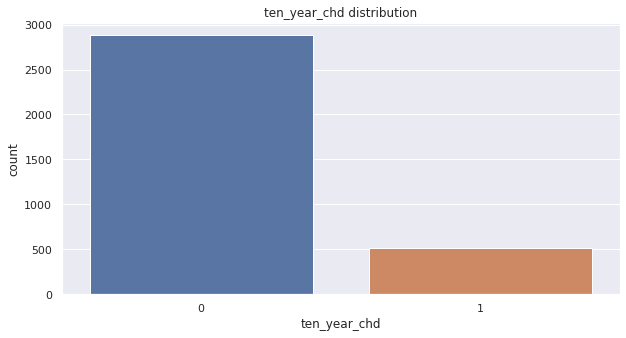

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(df[dependent_var[0]])
plt.xlabel(dependent_var[0])
plt.title(dependent_var[0]+' distribution')

In [48]:
df[dependent_var].value_counts()

ten_year_chd
0               2879
1                511
dtype: int64

In [49]:
511/(2879+511)

0.15073746312684366

The dependent variable - 10-year risk of coronary heart disease is unbalanced. Only ~15% of the patients in the study were eventually exposed to the risk of this heart disease, rest of the patients were not exposed to this disease after the end of 10 year study.

The dependent variables are unbalanced. This must be taken into consideration during the model building, and evaluation phase.

**Analyzing the distribution of the continuous independent variables:**

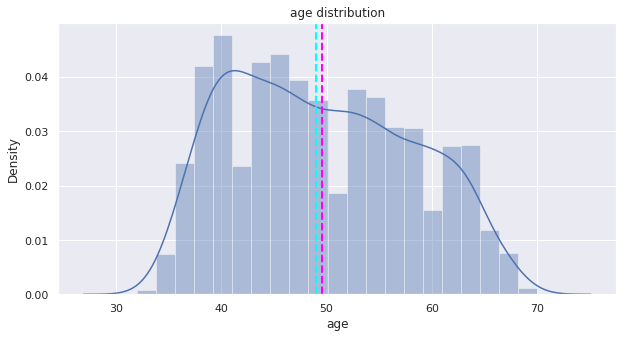

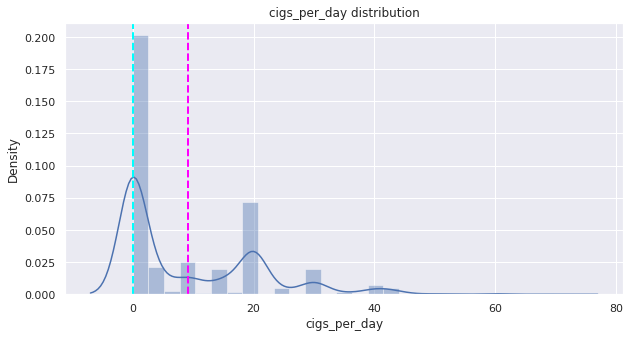

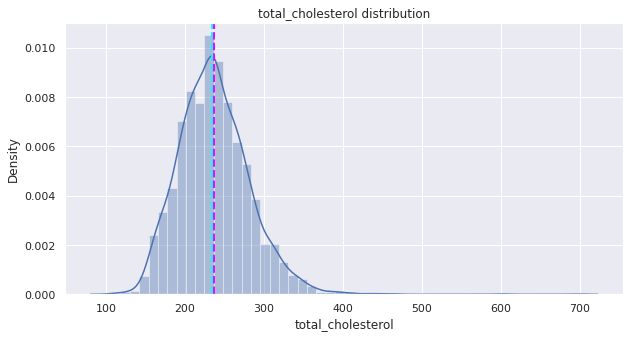

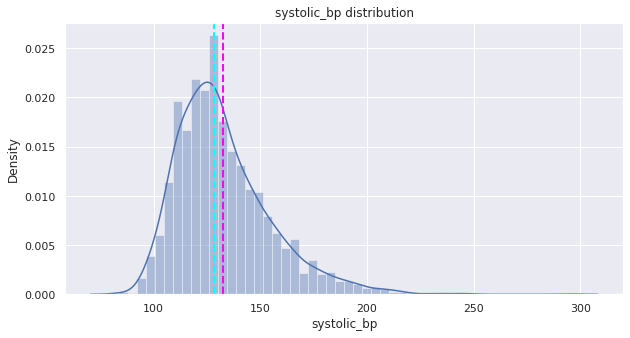

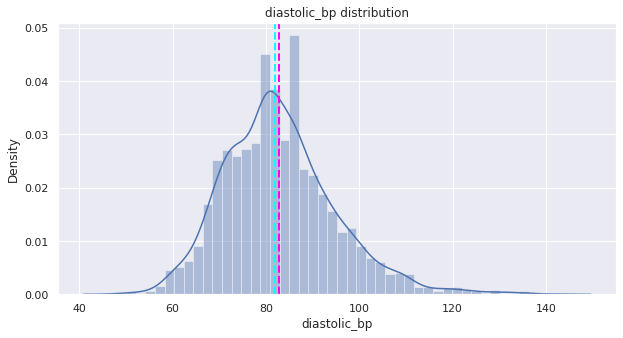

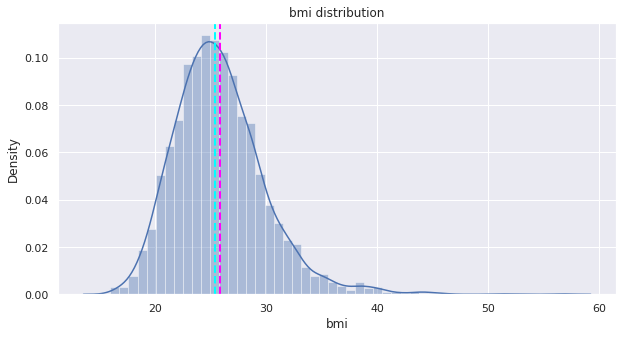

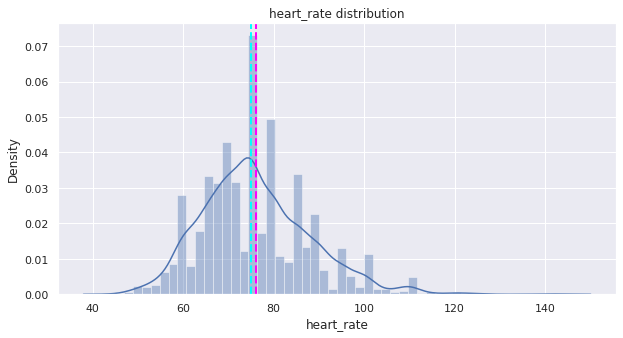

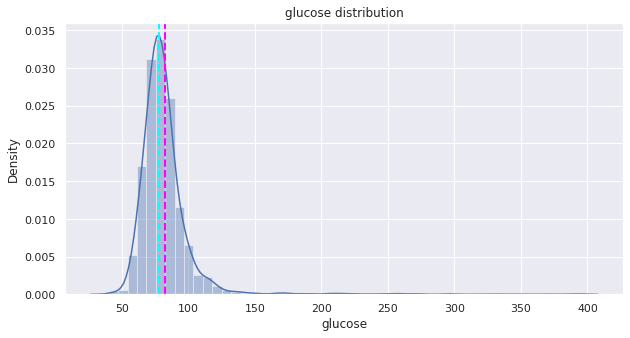

In [50]:
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

All the continuous dependent variables are almost normally distributed except the cigs_per_day, which is positively skewed.

Summary:
*  Noramally distributed variables: age, total_cholestrol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose.
* Positively skewed variables: cigs_per_day.

**Analyzing the distribution of the discrete independent variables:**

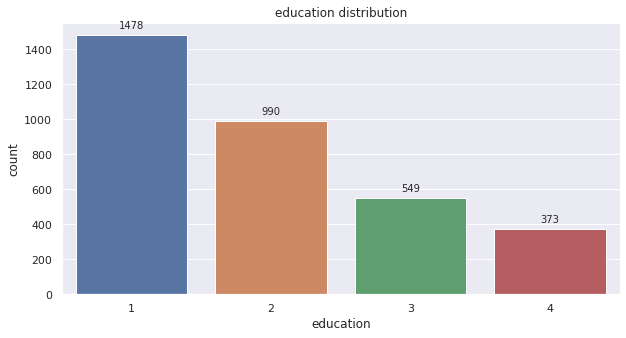

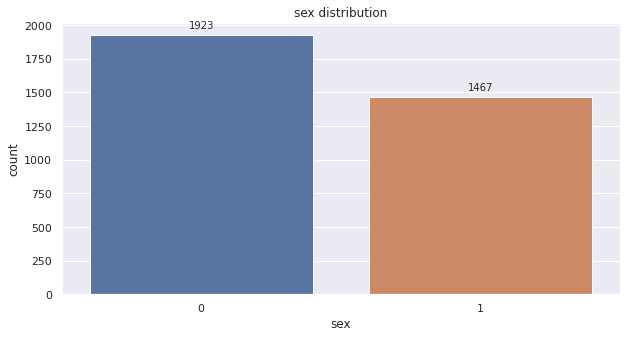

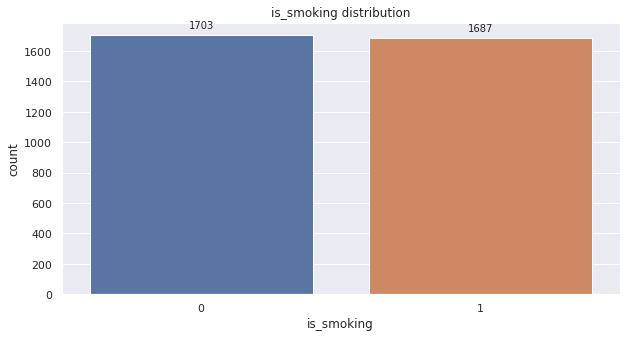

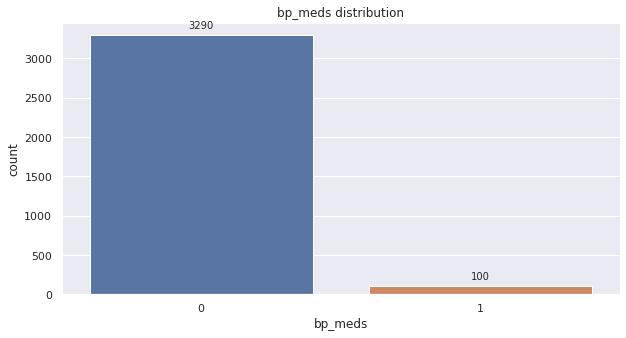

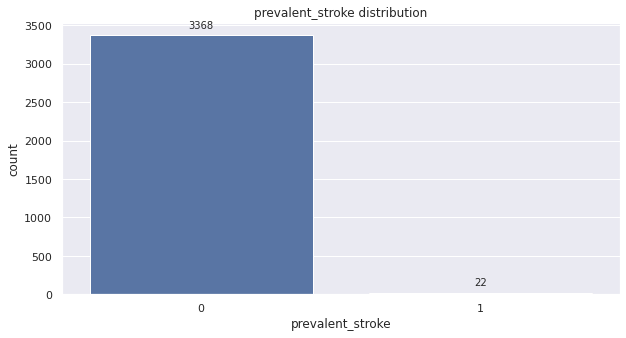

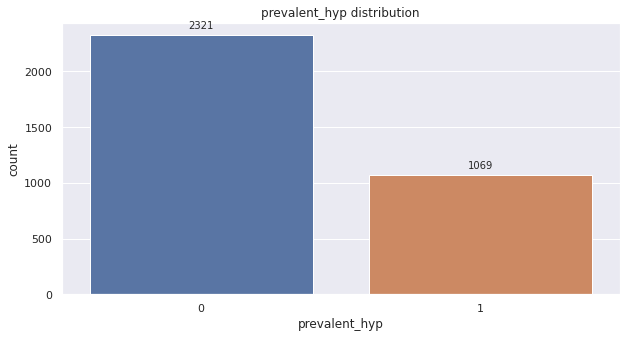

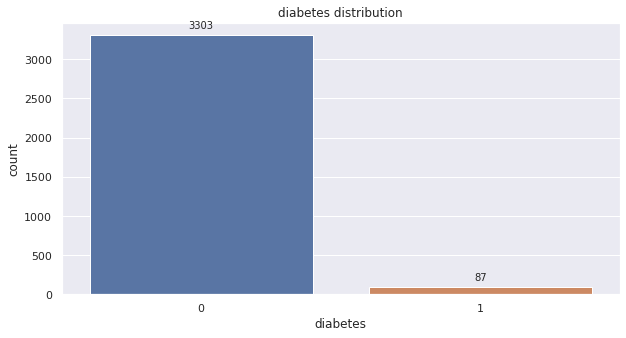

In [51]:
for i in categorical_var:
  plt.figure(figsize=(10,5))
  p = sns.countplot(df[i])
  plt.xlabel(i)
  plt.title(i+' distribution')
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.show()

Summary:
* Majority of the patients belong to the education level 1, followed by 2, 3, and 4 respectively.
* There are more female patients compared to male patients.
* Almost half the patients are smokers.
* 100 patients under the study are undertaking blood pressure medication.
* 22 patients under the study have experienced a stroke.
* 1069 patients have hypertension.
* 87 patients have diabities.

**Analyzing the relationship between the dependent variable and the continuous variables in the data:**

<Figure size 720x360 with 0 Axes>

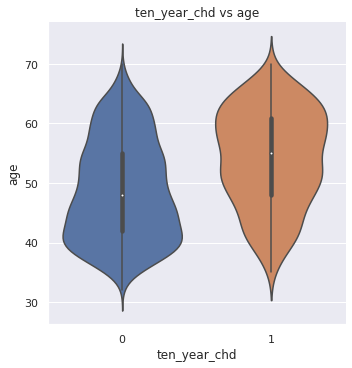

<Figure size 720x360 with 0 Axes>

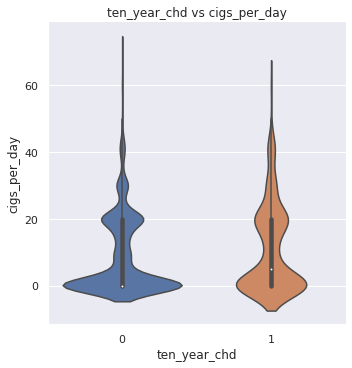

<Figure size 720x360 with 0 Axes>

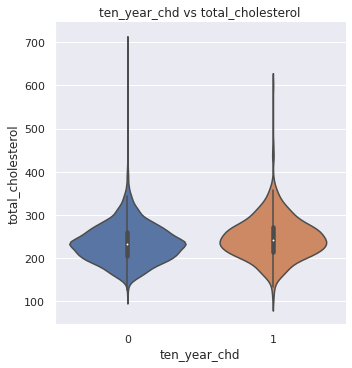

<Figure size 720x360 with 0 Axes>

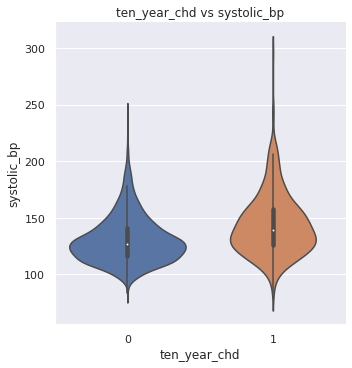

<Figure size 720x360 with 0 Axes>

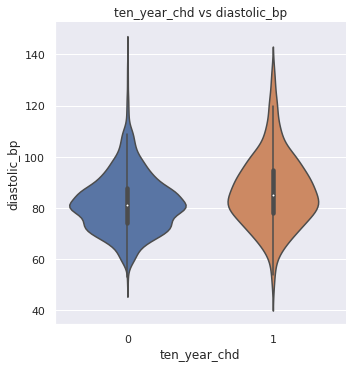

<Figure size 720x360 with 0 Axes>

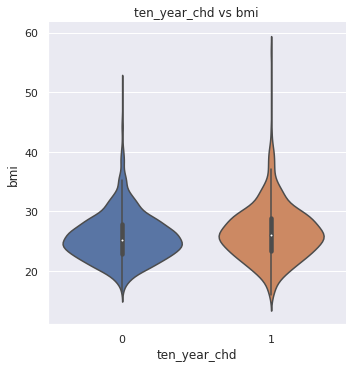

<Figure size 720x360 with 0 Axes>

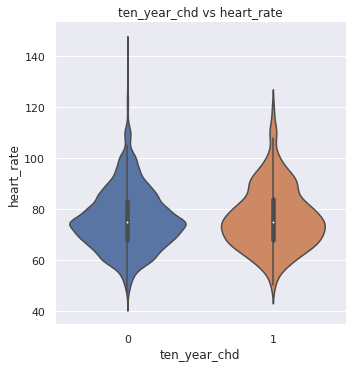

<Figure size 720x360 with 0 Axes>

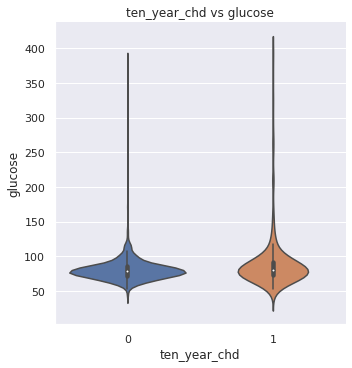

In [52]:
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_var[0],y=i,data=df,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()

Summary:
* The risk of CHD is higher for older patients than younger patients.

**Analyzing the relationship between the dependent variable and the discrete variables in the data:**

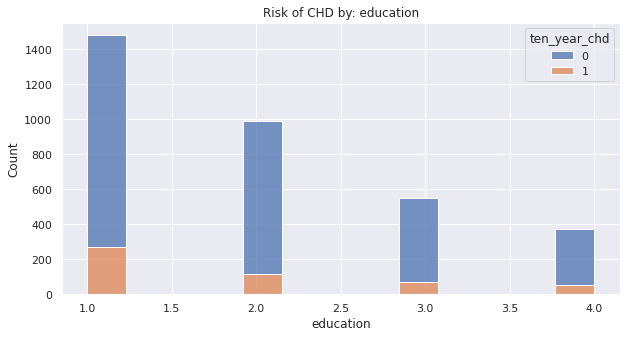

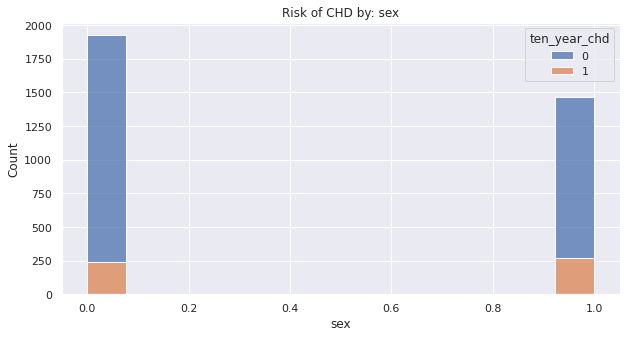

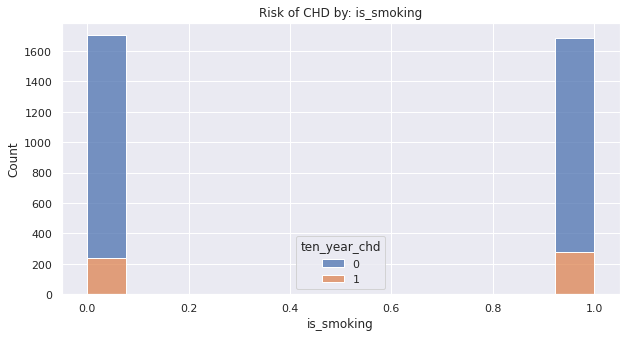

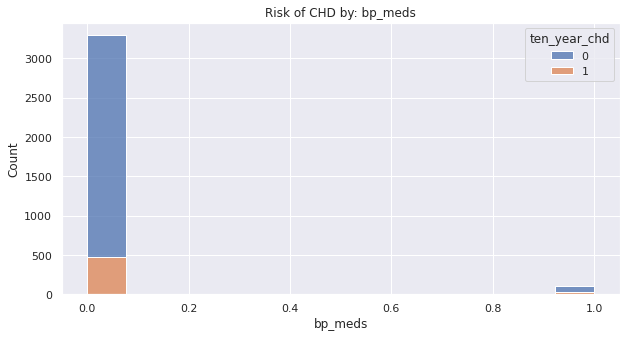

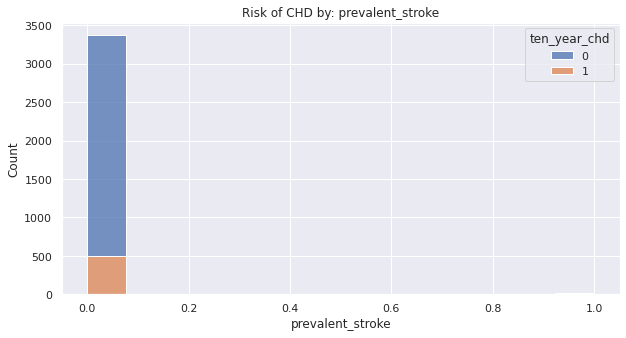

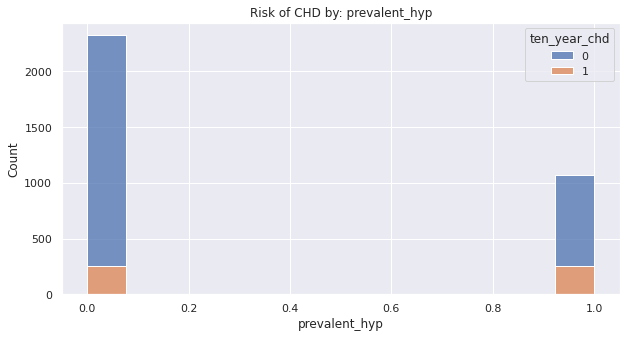

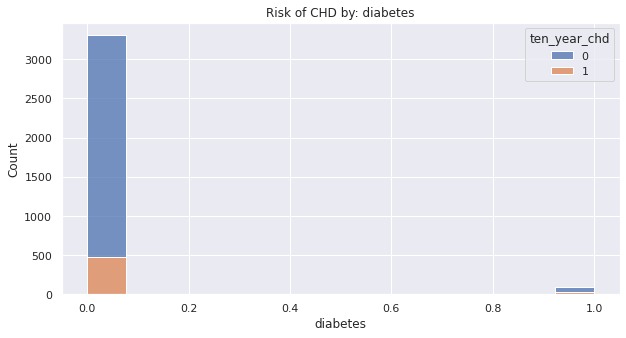

In [53]:
for i in categorical_var:
  plt.figure(figsize=(10,5))
  sns.histplot(x=i, hue=dependent_var[0], data=df, stat="count", multiple="stack")
  plt.title('Risk of CHD by: '+i)
  # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
  plt.show()

* Since the attributes are unevenly distributed, it is difficult to make direct comparisons and draw conclusions.
* Let's build a 100% stacked bar chart to get a better idea of the distribution of the dependent variable.

<Figure size 720x360 with 0 Axes>

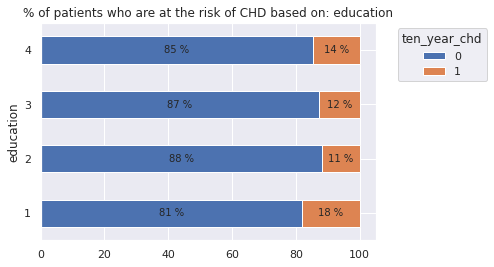

<Figure size 720x360 with 0 Axes>

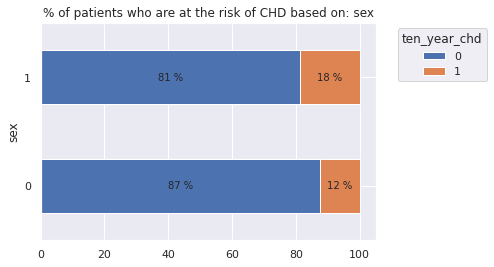

<Figure size 720x360 with 0 Axes>

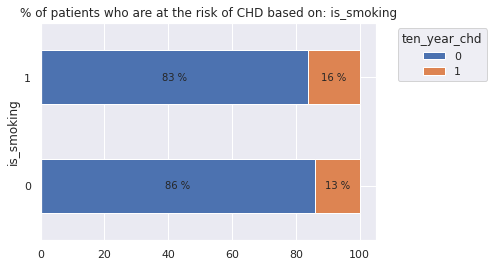

<Figure size 720x360 with 0 Axes>

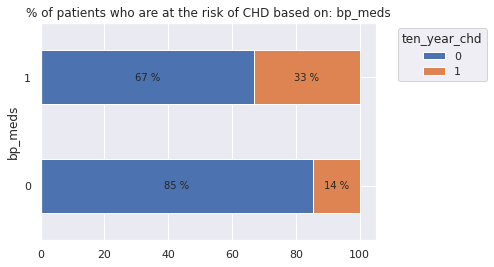

<Figure size 720x360 with 0 Axes>

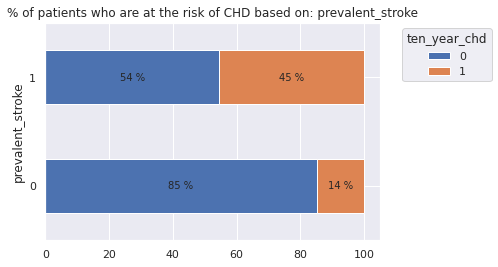

<Figure size 720x360 with 0 Axes>

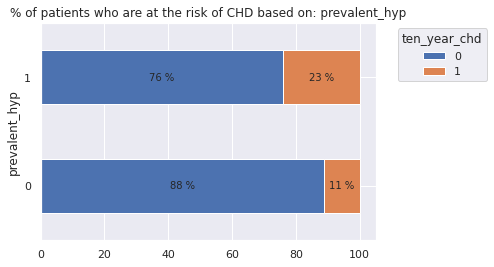

<Figure size 720x360 with 0 Axes>

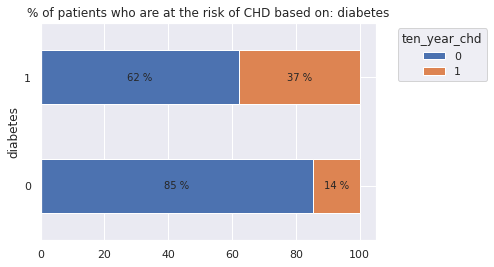

In [54]:
# 100% stacked bar chart

for i in categorical_var:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients who are at the risk of CHD based on: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

Summary:
* 18%, 11%, 12%, 14% of the patients belonging to the education level 1, 2, 3, 4 respectively were eventually diagnosed with CHD.
* Male patients have significantly higher risk of CHD (18%) than female patients (12%)
* Patients who smoke have significantly higher risk of CHD (16%) than patients who don't smoke (13%)
* Patients who take BP medicines have significantly higher risk of CHD (33%) than other patients (14%)
* Patients who had experienced a stroke in their life have significantly higher risk of CHD (45%) than other patients (14%)
* Hypertensive patients have significantly higher risk of CHD (23%) than other patients (11%)
* Diabetic patients have significantly higher risk of CHD (37%) than other patients (14%)




**Correlation analysis:**

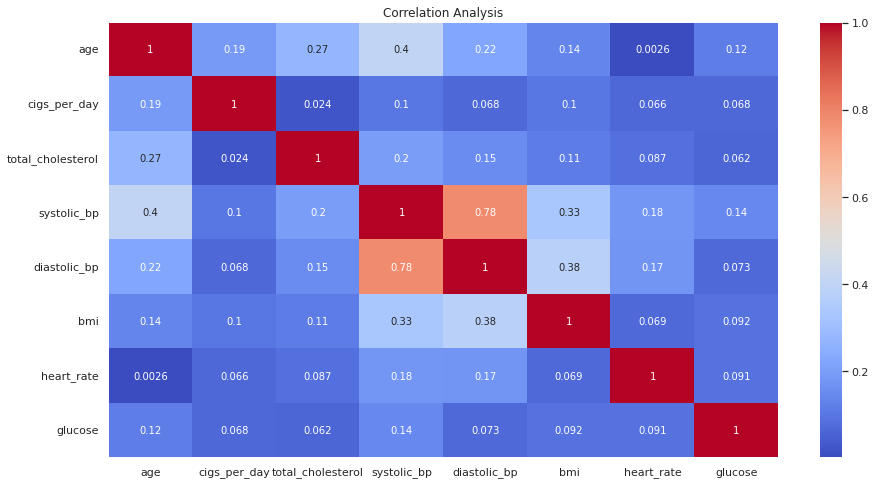

In [55]:
# Correlation magnitude
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[continuous_var].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

* Above is the correlation heatmap for all the continuous variables in the dataset.
* The varaibles systolic BP and diastotic BP are highly correlated.

In [56]:
# Range of systolic bp and diastolic bp

print(df['systolic_bp'].min(),df['systolic_bp'].max())
print(df['diastolic_bp'].min(),df['diastolic_bp'].max())

83.5 295.0
48.0 142.5


To handle the correlation between these two continuous variables, we can replace them with the addition of a new variable 'pulse pressure', which can be given as follows:

Pulse Pressure = Systolic BP - Diastolic BP

[Reference](https://my.clevelandclinic.org/health/symptoms/21629-pulse-pressure)

From the above resourse, we also found that:
* The normal pulse pressure is around 40 mmHg
* Pulse pressures of 50 mmHg or more can increase the risk of heart disease, heart rhythm disorders, stroke and more.
* Higher pulse pressures are also thought to play a role in eye and kidney damage from diseases like diabetes.
* Low pulse pressure - is where the pulse pressure is one-fourth or less of the systolic blood pressure.
* This happens when your heart isn’t pumping enough blood, which is seen in heart failure and certain heart valve diseases. It also happens when a person has been injured and lost a lot of blood or is bleeding internally.

In [57]:
# Creating a new column pulse_pressure
# and dropping systolic_bp and diastolic_bp

df['pulse_pressure'] = df['systolic_bp']-df['diastolic_bp']
df.drop('systolic_bp',axis=1,inplace=True)
df.drop('diastolic_bp',axis=1,inplace=True)

In [58]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'pulse_pressure'],
      dtype='object')

In [59]:
# Updating the continuous_var list

continuous_var.remove('systolic_bp')
continuous_var.remove('diastolic_bp')
continuous_var.append('pulse_pressure')

**Pulse pressure:**

Text(0.5, 1.0, 'glucose distribution')

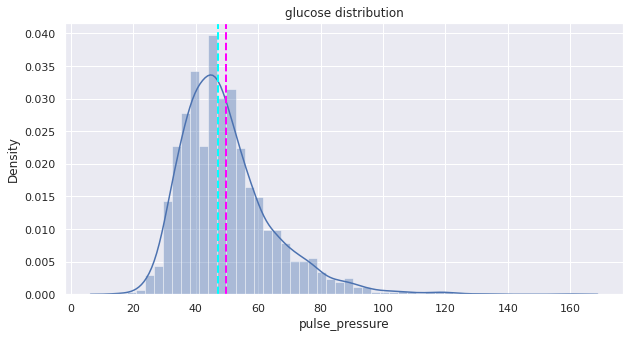

In [60]:
plt.figure(figsize=(10,5))
sns.distplot(df['pulse_pressure'])
plt.axvline(df['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['pulse_pressure'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title(col+' distribution')

<Figure size 720x360 with 0 Axes>

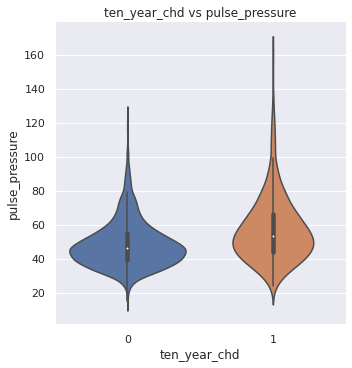

In [61]:
plt.figure(figsize=(10,5))
sns.catplot(x=dependent_var[0],y='pulse_pressure',data=df,kind='violin')
plt.title('ten_year_chd vs pulse_pressure')
plt.show()

Summary:
* The pulse pressures are positively skewed
* On average, the patients with higher pulse pressure are exposed to the coronary heart disease over the period of 10 years.

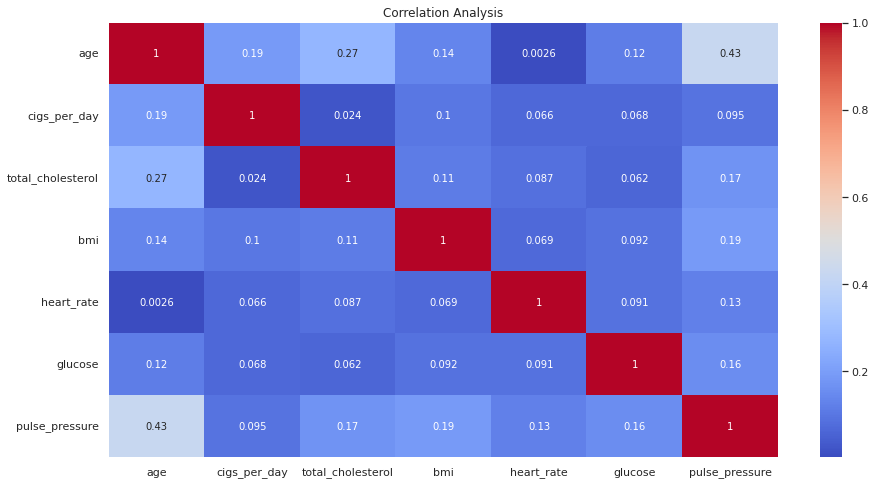

In [62]:
# Correlation magnitude
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[continuous_var].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

We were successful in handling multicollinearity amongst the continuous variables in the dataset.

**Outlier analysis:**

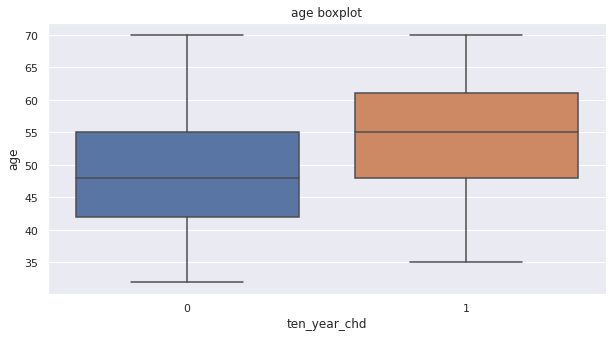

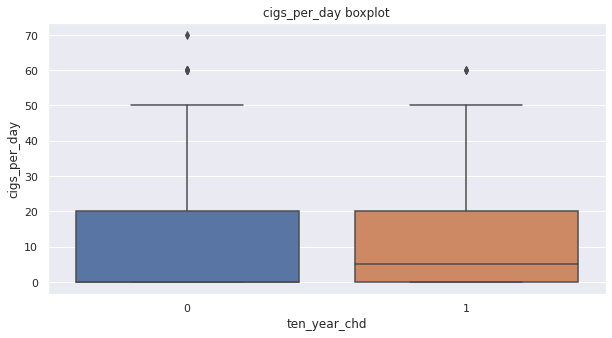

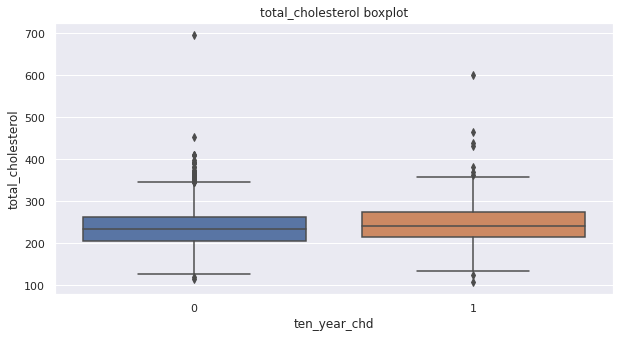

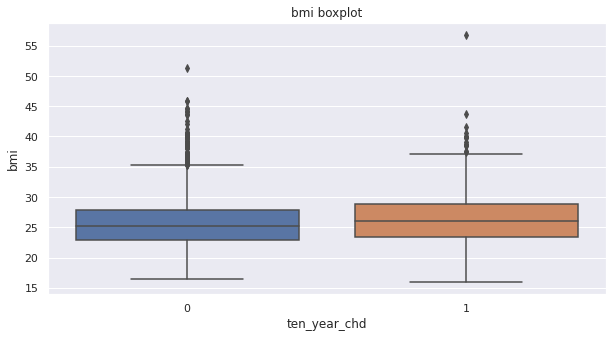

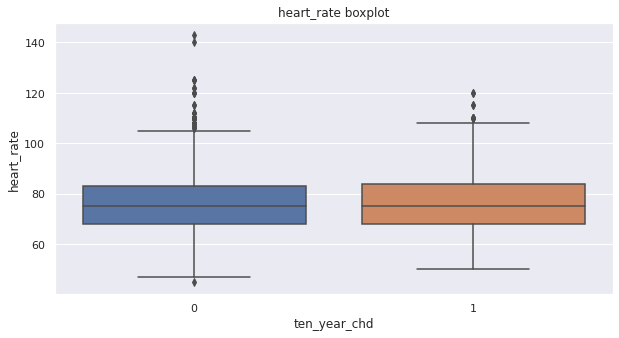

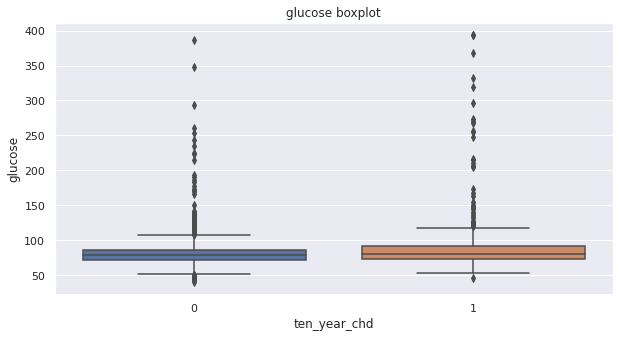

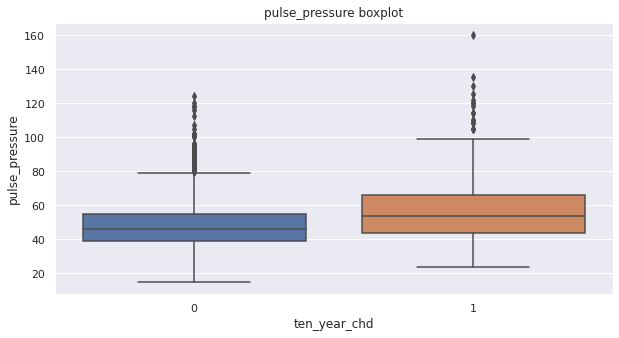

In [63]:
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = col,x = dependent_var[0],data=df)
  plt.title(col+' boxplot')
  plt.show()

* There are outliers in the data, it is decided not to handle them at this point of time because from the EDA, it is understood that the patients with exterme health conditions are more at risk from coronary heart diseases on average.
* The fact that we have outliers in the data must be considered while choosing prediction model in the model building phase.



# **Modelling:**

In [64]:
df.head()

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,ten_year_chd,pulse_pressure
0,64,2,0,1,3,0,0,0,0,221.0,25.38,90.0,80.0,1,63.0
1,36,4,1,0,0,0,0,1,0,212.0,29.77,72.0,75.0,0,70.0
2,46,1,0,1,10,0,0,0,0,250.0,20.35,88.0,94.0,0,45.0
3,50,1,1,1,20,0,0,1,0,233.0,28.26,68.0,94.0,1,70.0
4,64,1,0,1,30,0,0,0,0,241.0,26.42,70.0,77.0,0,51.5


In [65]:
df.shape

(3390, 15)

In [66]:
# Defining dependent and independent variables
X = df.drop('ten_year_chd',axis=1)
y = df[dependent_var]

**Choice of prediction model:**

* We are working on binary classification problem.
* Here we can start with a simple model, as a baseline model, which is interpretable, ie, Logistic Regression
* To get more accurate predictions, fit more complex models: Decision tree, KNN classifier, Random forests, XG boost.

**Evaluation metrics:**
* Since the data we are dealing with is unbalanced, accuracy may not be the best evaluation metric to evaluate the model performance.
* Also, since we are dealing with data related to healthcare, False Negatives are of higher concern than False Positive
* In other words, it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected
* Considering these points in mind, it is decided that we use **Recall** as the model evaluation metric.
\begin{align}
        Recall = \frac{True Positive}{True Positive + False Negative}
    \end{align}

In [67]:
# function to get recall score
from sklearn.metrics import recall_score

def recall(actual,predicted):
  '''
  recall(actual,predicted)
  '''
  return recall_score(y_true=actual, y_pred=predicted, average='binary')

**Sampling:**

* Since we are dealing with unbalanced data, ie only ~15% of the patients were diagnosed with coronary heart disease, we oversample the train dataset using SMOTE(Synthetic Minority Oversampling Technique).
* This ensures that the model has trained equally on all kinds of results, and it is not biased to one particular result.

In [68]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y, shuffle=True)

In [69]:
y_train.value_counts()

ten_year_chd
0               2303
1                409
dtype: int64

In [70]:
409/(409+2303)

0.15081120943952803

In [71]:
y_test.value_counts()

ten_year_chd
0               576
1               102
dtype: int64

In [72]:
102/(102+576)

0.1504424778761062

The train and test set contain almost equal proportion of results.

**Oversampling using SMOTE on the train dataset:**

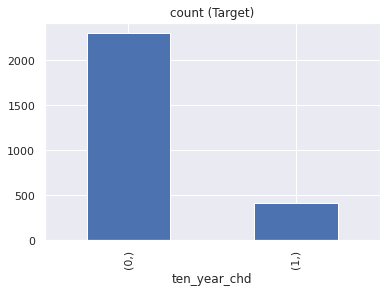

In [73]:
# visualize the target variable before SMOTE
y_train.value_counts().plot(kind='bar', title='count (Target)')

In [74]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 2712
Resampled dataset shape 4606


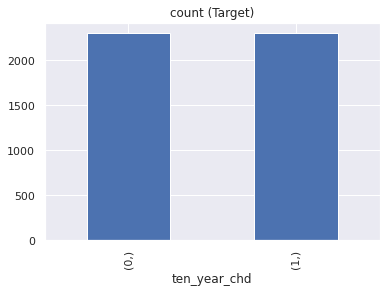

In [75]:
# visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='count (Target)')

* We have successfully oversampled the minority class using SMOTE. Now the model we build will be able to learn from both the classes without any bias.
* To confirm this, we can train model seperately on the original train data, and then on the oversampled data, and compare the test recall score.

**Scaling the data:**
* Since some predictive models which we have decided to build are based on distance (Logistic regression, KNN classifier, SVM), and require all the data points to be scaled within a certain range, we can use StandardScaler to scale down the variables.
* The results obtained from scaling can be stored and used while building those models.
* Tree algorithms do not require scaling.

In [76]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.fit_transform(X_test)

# Converting array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_smote_scaled = pd.DataFrame(X_smote_scaled,columns=X_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [77]:
X_train_scaled.head()

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,0.421053,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.232598,0.368063,0.200000,0.107345,0.141379
1,0.421053,0.000000,1.0,1.0,0.285714,0.0,0.0,0.0,0.0,0.273345,0.152322,0.126316,0.118644,0.134483
2,0.447368,0.333333,1.0,1.0,0.042857,0.0,0.0,1.0,0.0,0.235993,0.338618,0.284211,0.101695,0.234483
3,0.131579,0.000000,1.0,1.0,0.428571,0.0,0.0,0.0,0.0,0.285229,0.318800,0.389474,0.149718,0.220690
4,0.789474,0.666667,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.176570,0.340600,0.084211,0.121469,0.241379


In [78]:
X_smote_scaled.head()

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,0.421053,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.232598,0.368063,0.200000,0.107345,0.141379
1,0.421053,0.000000,1.0,1.0,0.285714,0.0,0.0,0.0,0.0,0.273345,0.152322,0.126316,0.118644,0.134483
2,0.447368,0.333333,1.0,1.0,0.042857,0.0,0.0,1.0,0.0,0.235993,0.338618,0.284211,0.101695,0.234483
3,0.131579,0.000000,1.0,1.0,0.428571,0.0,0.0,0.0,0.0,0.285229,0.318800,0.389474,0.149718,0.220690
4,0.789474,0.666667,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.176570,0.340600,0.084211,0.121469,0.241379


In [79]:
X_test_scaled.head()

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,0.647059,0.333333,0.0,1.0,0.500000,0.0,0.0,0.0,0.0,0.465046,0.053075,0.3375,0.152047,0.303922
1,0.411765,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.155015,0.245784,0.2500,0.134503,0.088235
2,0.823529,0.000000,1.0,1.0,0.716667,0.0,0.0,0.0,0.0,0.249240,0.241319,0.4375,0.064327,0.102941
3,0.441176,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.294833,0.141121,0.3125,0.096491,0.196078
4,0.676471,0.333333,1.0,1.0,0.016667,0.0,0.0,0.0,0.0,0.325228,0.174107,0.3125,0.111111,0.186275


**1. Logistic Regression**

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
# Fitting model
lr_model = LogisticRegression()

In [82]:
# training the model
lr_model.fit(X_smote_scaled, y_smote)

LogisticRegression()

In [83]:
# Train predictions
lr_train_pred = lr_model.predict(X_smote_scaled)

In [84]:
# training set recall
lr_train_recall = recall(y_smote,lr_train_pred)
lr_train_recall

0.6847590099869735

In [85]:
# Test predictions
lr_test_pred = lr_model.predict(X_test_scaled)

In [86]:
# Test recall
lr_test_recall = recall(y_test,lr_test_pred)
lr_test_recall

0.7058823529411765

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


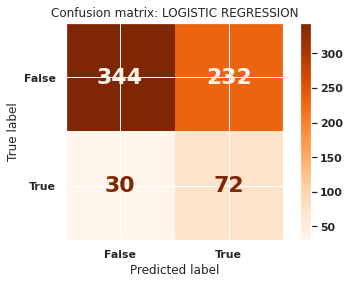

In [87]:
# Confusion matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
lr_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: LOGISTIC REGRESSION')
plt.show()

* The train and test recall scores are very close to each other.
* Hence, we can say that the model is not overfitting.
* The model was unable to predict 31 patients under study for coronary heart disease.

**2. K Nearest Neighbors:**

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
# approximating k = sqrt(n), n for training data = 4606
# k ~ 68
# Finding best value of k around this range
knn_model = KNeighborsClassifier()
knn_params = {'n_neighbors':np.arange(65,75)
             }

In [91]:
knn_gridsearch = GridSearchCV(knn_model,
                              knn_params,
                              cv=4,
                              scoring= 'recall')
knn_gridsearch.fit(X_smote_scaled,y_smote)
knn_best_params = knn_gridsearch.best_params_

In [92]:
# model best parameters
knn_best_params

{'n_neighbors': 67}

In [93]:
# building knn model with best parameters
knn_model = KNeighborsClassifier(n_neighbors=knn_best_params['n_neighbors']
                                 )

In [94]:
# training the model
knn_model.fit(X_smote_scaled, y_smote)

KNeighborsClassifier(n_neighbors=67)

In [95]:
# Train predictions
knn_train_pred = knn_model.predict(X_smote_scaled)

In [96]:
# training set recall
knn_train_recall = recall(y_smote,knn_train_pred)
knn_train_recall

0.7867998263135041

In [97]:
# Test predictions
knn_test_pred = knn_model.predict(X_test_scaled)

In [98]:
# Test recall
knn_test_recall = recall(y_test,knn_test_pred)
knn_test_recall

0.6862745098039216

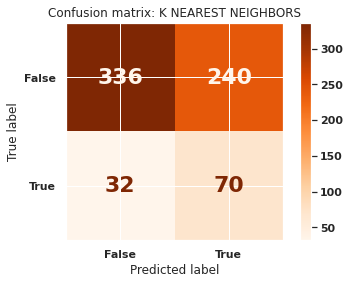

In [99]:
# Confusion matrix
knn_confusion_matrix = cm(y_test, knn_test_pred)
cm_display = cmd(confusion_matrix = knn_confusion_matrix, display_labels = [False, True])

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: K NEAREST NEIGHBORS')
plt.show()

* This model has low test recall score compared to train recall score

**3. Decision tree:**

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(10,20),
             'min_samples_leaf':np.arange(30,40)
             }

In [142]:
dt_gridsearch = GridSearchCV(dt_model,
                             dt_params,
                             cv=4,
                             scoring= 'recall')
dt_gridsearch.fit(X_smote,y_smote)
dt_best_params = dt_gridsearch.best_params_

In [143]:
# model best parameters
dt_best_params

{'max_depth': 10, 'min_samples_leaf': 36}

In [144]:
# building knn model with best parameters
dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'],
                                  min_samples_leaf=dt_best_params['min_samples_leaf'])

In [145]:
# training the model on smote values
dt_model.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=36)

In [146]:
# Train predictions
dt_train_pred = dt_model.predict(X_smote)

In [147]:
# training set recall
dt_train_recall = recall(y_smote,dt_train_pred)
dt_train_recall

0.7850629613547546

In [148]:
# Test predictions
dt_test_pred = dt_model.predict(X_test)

In [149]:
# Test recall
dt_test_recall = recall(y_test,dt_test_pred)
dt_test_recall

0.5294117647058824

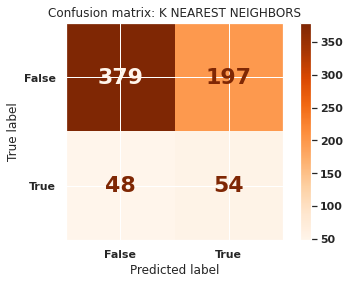

In [150]:
# Confusion matrix
dt_confusion_matrix = cm(y_test, dt_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: K NEAREST NEIGHBORS')
plt.show()